### Ensemble class used to get standard deviation for the iterative unfolding method 

The ensemble saves every perturbed matrix together with the standard deviation of the raw matrix, unfolded matrix and first generation matrix to file (called saved_run). To run the ensemble one must include the first generation method. However it has not been used in the thesis and is only used to extract the standard deviation of the unfolding.

In [2]:
import ompy as om 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math as m
import pandas as pd 


<IPython.core.display.Javascript object>


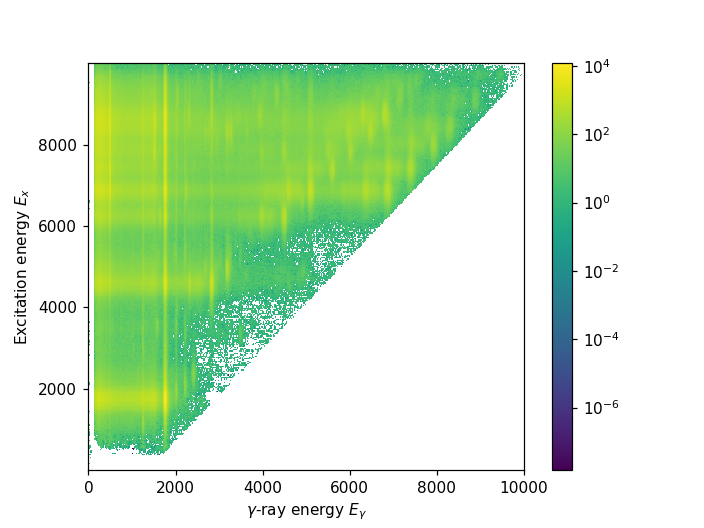

(322, 500)
500


In [84]:
%matplotlib notebook

# Reading the data and removing/filling negatives 
raw = om.Matrix(path="/home/vala/Downloads/h_Ex_Eg_improved_bgsubtr_noneg_28Si.m")



raw.cut_diagonal(E1=(1800, 500), E2=(10500, 10000))

raw.cut('Ex',0, 10000)
raw.cut('Eg', 0, 10000)
raw.rebin(axis= "Eg", factor=4)

raw.plot()

print(raw.shape)

raw_py, E = raw.projection(axis="Eg", Emin=1400, Emax=2200)

Eg = raw.Eg
print(len(Eg))

<IPython.core.display.Javascript object>


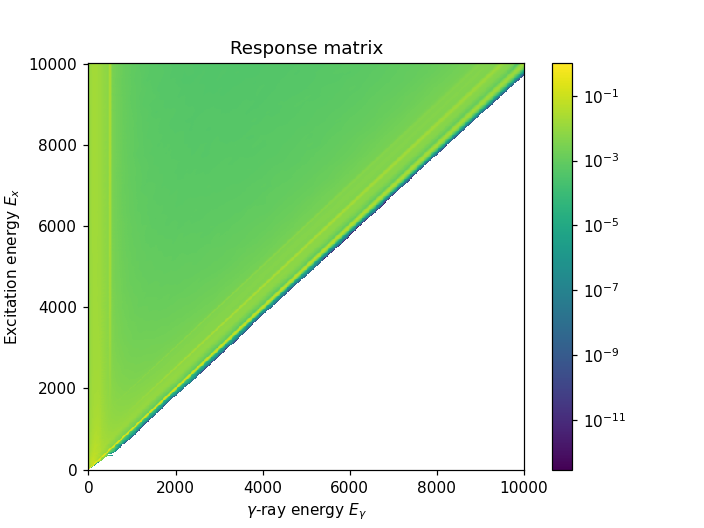

(<matplotlib.collections.QuadMesh at 0x7f798777a8d0>,
 <Figure size 640x480 with 2 Axes>)

In [85]:
%matplotlib notebook
fwhm_abs = 30.0
folderpath = "/home/vala/Documents/Master/MachineLearning/ompy/OCL_response_functions/oscar2017_scale1.15"
response = om.Response(folderpath)

R_ompy_view, R_tab_view = response.interpolate(Eg, fwhm_abs=fwhm_abs, return_table=True)
R_ompy_unf, R_tab_unf = response.interpolate(Eg, fwhm_abs=fwhm_abs/10, return_table=True)

R_ompy_view.plot(title="Response matrix", scale='log')

In [86]:
resp_OMpy = R_ompy_view.values  
print(resp_OMpy.shape)

(500, 500)


In [87]:
unfolder= om.Unfolder(response=R_ompy_unf)
unfolder.response_tab = R_tab_view 
unfolder.use_compton_subtraction = True 
unfolder.num_iter = 500
#print(unfolder.iscores)
unfolder.FWHM_tweak_multiplier = {"fe": 1., "se": 1.1,
                                     "de": 1.3, "511": 0.9}
unfolded_OMpy = unfolder(raw)

<IPython.core.display.Javascript object>


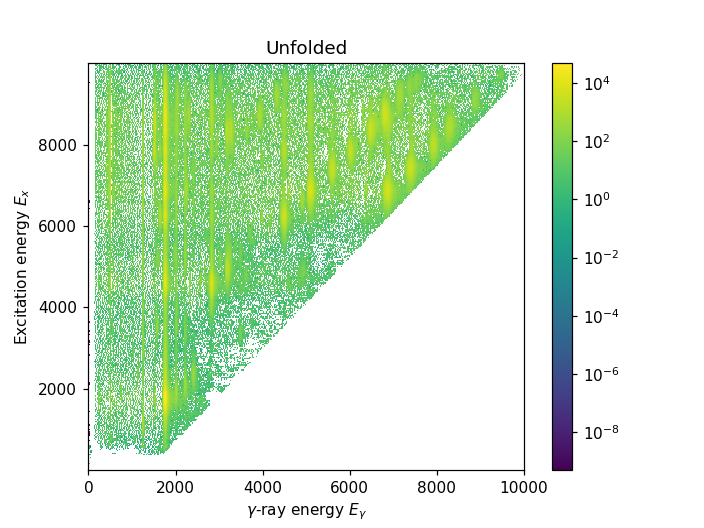

(<matplotlib.collections.QuadMesh at 0x7f7987663350>,
 <Figure size 640x480 with 2 Axes>)

In [88]:
unfolded_OMpy.plot()

<IPython.core.display.Javascript object>


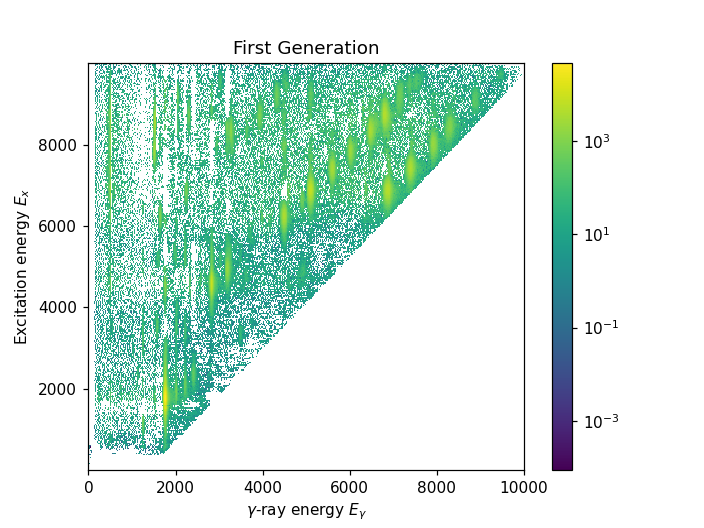

In [89]:
# First generation method in the Oslo-Method has to be runned to use ensemble.
# The aim was to get the standard deviation of the unfolded, so first gen is not used for anything else.
firstgen = om.FirstGeneration()
primary = firstgen(unfolded_OMpy)
primary.plot();

In [90]:
# Running ensemble. 
ensemble = om.Ensemble(raw=raw)
ensemble.unfolder = unfolder
ensemble.first_generation_method = firstgen

ensemble.generate(100, regenerate=True)

<IPython.core.display.Javascript object>


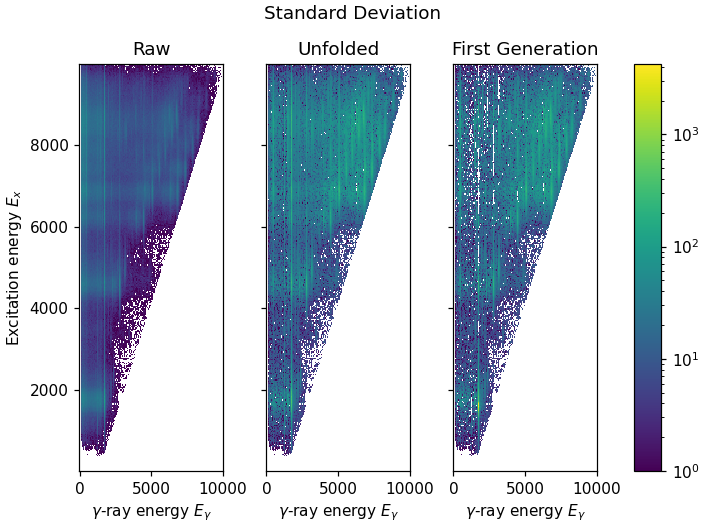

(<Figure size 640x480 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7987725710>,
       dtype=object))

In [91]:
# all std shown for raw, unfolded and first gen
ensemble.plot()

In [92]:
raw_std = ensemble.std_raw

<IPython.core.display.Javascript object>


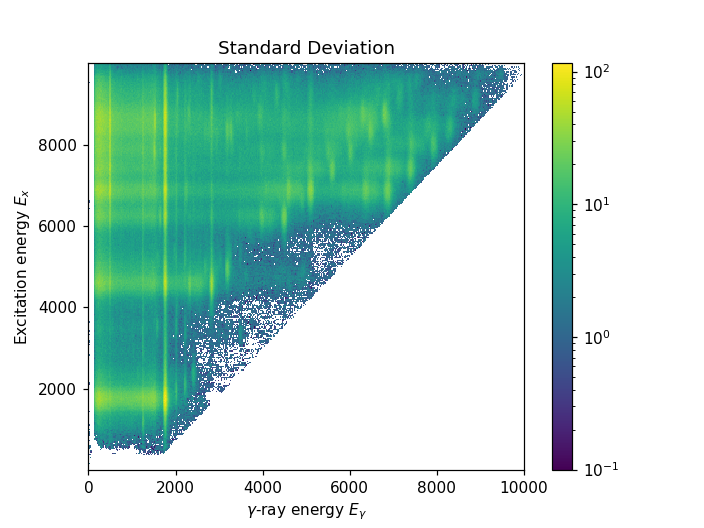

In [93]:
# Standard deviation for the raw data 
raw_std.plot()

raw_std_proj, E = raw_std.projection(axis="Eg", Emin=1400, Emax=2200)

<IPython.core.display.Javascript object>


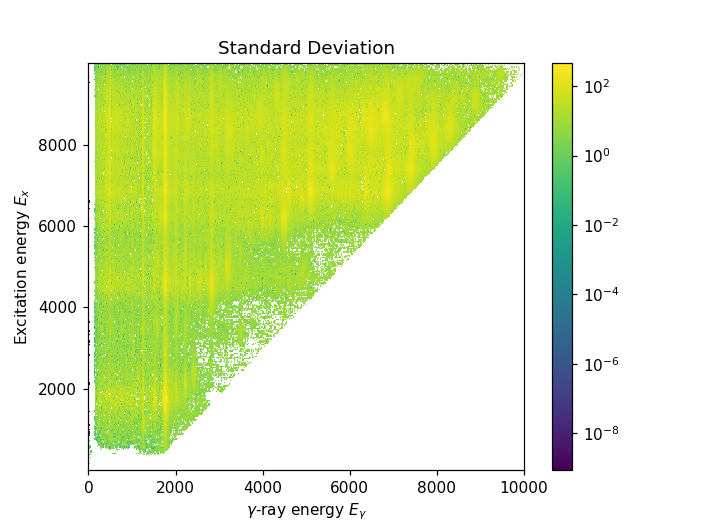

(<matplotlib.collections.QuadMesh at 0x7f7987297690>,
 <Figure size 640x480 with 2 Axes>)

In [94]:
# Standard deviation for the unfolded matrix of the iterative unfolding method
unfolded_std = ensemble.std_unfolded

unfolded_std.plot()